epoch: 0 loss: 1.3016010517631431


/tmp/ipython-input-2842748886.py:54: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


epoch: 500 loss: 1.0986114018164626
epoch: 1000 loss: 1.09861138932731
epoch: 1500 loss: 1.0986113763049612
epoch: 2000 loss: 1.098611362714736
epoch: 2500 loss: 1.0986113485188893
epoch: 3000 loss: 1.0986113336762637
epoch: 3500 loss: 1.0986113181418962
epoch: 4000 loss: 1.0986113018665682
epoch: 4500 loss: 1.0986112847962917

Final Accuracy: 0.332


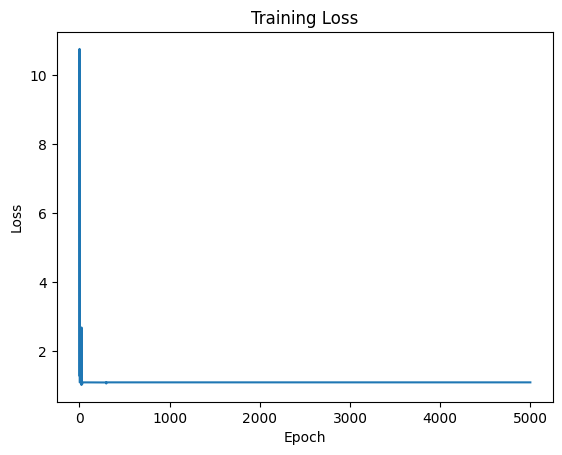

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------
# 1) GENERATE 500 DATA POINTS WITH 3 CLASSES
# ------------------------------------------------

np.random.seed(0)

N = 500
K = 3
D = 2

X = np.zeros((N, D))
Y = np.zeros((N, 1), dtype=int)

# create 3 spirals (nice separable dataset)
for j in range(K):
    ix = range(int(N/K)*j, int(N/K)*(j+1))
    r = np.linspace(0.0, 1, len(ix))
    t = np.linspace(j*4, (j+1)*4, len(ix)) + np.random.randn(len(ix))*0.2
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    Y[ix] = j

# one-hot encode (for 3 output classes)
Y_onehot = np.zeros((N, K))
for i in range(N):
    Y_onehot[i, Y[i]] = 1


# ------------------------------------------------
# 2) THREE-LAYER NEURAL NETWORK (extend your NN)
# ------------------------------------------------

class NN(object):

    def __init__(self):

        self.inputLayerNeurons  = 2
        self.hiddenLayer1Neurons = 10
        self.hiddenLayer2Neurons = 10
        self.outputLayerNeurons = 3

        # weights (input→h1 , h1→h2 , h2→output)
        self.W_HI = np.random.randn(self.inputLayerNeurons , self.hiddenLayer1Neurons)
        self.W_HH = np.random.randn(self.hiddenLayer1Neurons, self.hiddenLayer2Neurons)
        self.W_HO = np.random.randn(self.hiddenLayer2Neurons, self.outputLayerNeurons)

        self.lr = 0.1

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp / np.sum(exp, axis=1, keepdims=True)

    def feedforward(self, x):

        self.h1_input  = np.dot(x, self.W_HI)
        self.h1_output = self.sigmoid(self.h1_input)

        self.h2_input  = np.dot(self.h1_output, self.W_HH)
        self.h2_output = self.sigmoid(self.h2_input)

        self.out_input = np.dot(self.h2_output, self.W_HO)
        pred = self.softmax(self.out_input)

        return pred

    def backprop(self, x, y, pred):

        # output layer error
        out_err = pred - y               # softmax + crossentropy derivative
        out_delta = out_err

        # hidden layer 2
        h2_err = np.dot(out_delta, self.W_HO.T)
        h2_delta = self.lr * h2_err * self.sigmoid(self.h2_output, der=True)

        # hidden layer 1
        h1_err = np.dot(h2_delta, self.W_HH.T)
        h1_delta = self.lr * h1_err * self.sigmoid(self.h1_output, der=True)

        # update weights
        self.W_HO -= np.dot(self.h2_output.T, out_delta)
        self.W_HH -= np.dot(self.h1_output.T, h2_delta)
        self.W_HI -= np.dot(x.T, h1_delta)

    def train(self, x, y):
        pred = self.feedforward(x)
        self.backprop(x, y, pred)


# ------------------------------------------------
# TRAINING
# ------------------------------------------------

obj = NN()
losses = []

for i in range(5000):

    pred = obj.feedforward(X)
    loss = np.mean(-np.sum(Y_onehot * np.log(pred + 1e-7), axis=1))
    losses.append(loss)

    obj.train(X, Y_onehot)

    if i % 500 == 0:
        print("epoch:", i, "loss:", loss)


# ------------------------------------------------
# ACCURACY
# ------------------------------------------------

pred_final = obj.feedforward(X)
pred_class = np.argmax(pred_final, axis=1)
acc = np.mean(pred_class == Y.flatten())

print("\nFinal Accuracy:", acc)


# ------------------------------------------------
# PLOT LOSS CURVE
# ------------------------------------------------

plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
